# Latihan

Gunakan data titanic dari seaborn.  
* target=survived  
* fitur= 'pclass','sex','age','fare'  
* isi missing value (tentukan sendiri metodenya)
* split data menjadi train dan test (80:20)
* bandingkan performa model berikut:
    * Logistic Regression tanpa scaling
    * Logistic Regression dengan scaling
    * KNN tanpa scaling
    * KNN dengan scaling
    * Decision Tree
    
    
untuk log regresinya pakai sklearn punya aja

jangan lupa, untuk KNN, cari best K nya


In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
titanic=sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [18]:
x.describe()

,pclass,age,fare
count,891.000000,714.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,20.125000,7.910400
50%,3.000000,28.000000,14.454200
75%,3.000000,38.000000,31.000000
max,3.000000,80.000000,512.329200


In [42]:
titanic['age'].fillna(value=titanic['age'].median(), inplace=True)
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [43]:
titanic['sex']=np.where(titanic['sex']=='male',1,0)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## splitting data

In [44]:
x=titanic[['pclass', 'sex', 'age', 'fare']]
y=titanic['survived']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

# Logistic Regression

### Collinearity

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [62]:
def calc_vif(X):
    #calculating vif
    vif=pd.DataFrame()
    vif['variabels']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
    return vif

In [69]:
calc_vif(x)

,variabels,VIF
0,pclass,3.728285
1,sex,2.901604
2,age,4.057797
3,fare,1.426615


### Modelling

In [64]:
import statsmodels.api as sm

In [65]:
sm_logit=sm.Logit(y, sm.add_constant(x))
result=sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.452022
         Iterations 6


In [66]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                  0.3212
Time:                        11:32:17   Log-Likelihood:                -402.75
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.282e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6553      0.509      9.153      0.000       3.659       5.652
pclass        -1.1529      0.136     -8.505      0.000      -1.419      -0.887
sex           -2.6073      0.187    -13.924      0.0

### Model Interpretation

odd=exp^(bo+bi*Xi)

1. B1 (pclass)

In [87]:
print(np.exp(-1.1529*1))
np.exp(1.1529*1)

0.3157198529193261


3.1673649621758937

> ketika nilai `pclass` meningkat 1 tingkat dan variabel lainnya tetap, maka kemungkinan untuk survive menurun 3.1673 kali

2. B2 (sex)

In [89]:
print(np.exp(-2.6073*1))
np.exp(2.6073*1)

0.07373335530602235


13.562382938489748

> tingkat survive yg dihasilkan oleh Male (1) lebih rendah 13.5623 kali dibandingkan tingkat survive Female (0).

3. B3 (age)

In [90]:
print(np.exp(-0.0331*1))
np.exp(0.0331*1)

0.9674418105706046


1.0336538994631546

> ketika nilai `age` meningkat 1 tahun dan variabel lainnya tetap, maka kemungkinan untuk survive menurun 1.0336 kali

4. B4 (fare) tidak dihitung karena tidak signifikan (P>|z| > 0.005)

- LLR Test (LLR p-value):

    B1, B2, B3, B4 : p-value <= 0.05, artinya kita punya cukup bukti bahwa ada setidaknya satu fitur yg memiliki pengaruh signifikan terhadap nilai kemungkinan survive.
    

- Wald Test (P>|z|):
    1. B0 (constant) : p-val <= 0.05, artinya kita butuh B0 di model kita
    2. B1 (pclass) : p-val <= 0.05, artinya kita punya cukup bukti bahwa tingkat kelas penumpang memengaruhi nilai kemungkinan  survive
    3. B2 (sex) : p-val <= 0.05, artinya kita punya cukup bukti bahwa jenis kelamin 'pria' memengaruhi nilai kemungkinan survive.
    4. B3 (age) : p-val <= 0.05, artinya kita punya cukup bukti bahwa umur memengaruhi nilai kemungkinan survive
    5. B4 (fare) : p-val > 0.05, artinya kita tidak punya punya cukup bukti bahwa nilai biaya yg dikeluarkan penumpang memengaruhi nilai kemungkinan survive

    

- Parameter Estimate (coef)
    1. B1 (pclass) = -1.1529, tingkat kelas menurunkan kemungkinan survive, ketika nilai `pclass` meningkat 1 tingkat dan variabel lainnya tetap, maka kemungkinan untuk survive menurun 3.1673 kali.
    2. B2 (sex) = -2.6073, penumpang dengan jenis kelamin Male (1) menurunkan kemungkinan survive, tingkat survive yg dihasilkan oleh Male lebih rendah 13.5623 kali dibandingkan tingkat survive Female (0).
    3. B3 (age) = -0.0331, umur menurunkan kemungkinan survive, ketika nilai `age` meningkat 1 tahun dan variabel lainnya tetap, maka kemungkinan untuk survive menurun 1.0336 kali
    4. B4 (fare) = 0.0006, tidak diinterpretasikan karena hasil uji tidak signifikan.
    

*sangat disarankan untuk melakukan prediksi di dalam rentang observasi data (nilai max dan min masing2 fitur)*

- Coefficient Determination (Pseudo R-squ.):

    Pseudo R-squared = 0.3212 = 32.12%, model yg kita buat mampu menjelaskan 32.12% dari varians kemungkinan survive penumpang.

### Validation

    train data = 80%
    test data = 20%

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [96]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    stratify=y, 
    test_size=0.2, 
    random_state=2020 
)

In [97]:
sm_logit=sm.Logit(y_train,sm.add_constant(x_train))
result_train=sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.448448
         Iterations 6


In [98]:
y_predict_proba=result_train.predict(sm.add_constant(x_test))
y_predict_proba

560    0.087524
130    0.074336
551    0.235110
587    0.237550
2      0.584729
         ...   
818    0.053144
113    0.636197
605    0.068129
642    0.773769
206    0.077775
Length: 179, dtype: float64

In [99]:
y_predict_class=np.where(y_predict_proba>0.5,1,0)
y_predict_class

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0])

In [100]:
print('model accuracy score in test dataset:', accuracy_score(y_test,y_predict_class))

model accuracy score in test dataset: 0.7932960893854749


> akurasi 0.7932960893854749 = 79.33 % artinya model yg kita buat mampu memprediksi secara tepat 7 dari 10 kali

# KNN

### without Scalling

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn_wo = KNeighborsClassifier(n_neighbors=5)
knn_wo.fit(x_train, y_train)
y_predict=knn_wo.predict(x_test)

In [52]:
print('Akurasi model KNN without scalling di dataset test adalah:', accuracy_score(y_test, y_predict))

Akurasi model KNN without scalling di dataset test adalah: 0.6983240223463687


### with Scalling

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [53]:
knn_w = KNeighborsClassifier(n_neighbors=3) # define model, defaultnya 5 
knn_w.fit(x_train_scaled, y_train) # fitting / traing
y_predict=knn_w.predict(x_test_scaled) # prediksi

In [54]:
print('Akurasi model KNN with scalling di dataset test adalah:', accuracy_score(y_test, y_predict))

Akurasi model KNN with scalling di dataset test adalah: 0.7821229050279329


> nilai akurasi meningkat dari 69.83% menjadi 78.12% setelah dilakukan scalling

In [55]:
import matplotlib.pyplot as plt

In [56]:
k=range(1,30,2)
testing_score=[]
training_score=[]
score=0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    
    y_predict_train=knn.predict(x_train_scaled)
    training_score.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test=knn.predict(x_test_scaled)
    acc_score=accuracy_score(y_test,y_predict_test)
    testing_score.append(acc_score)
    
    if score<acc_score:
        score=acc_score
        best_k=i

C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


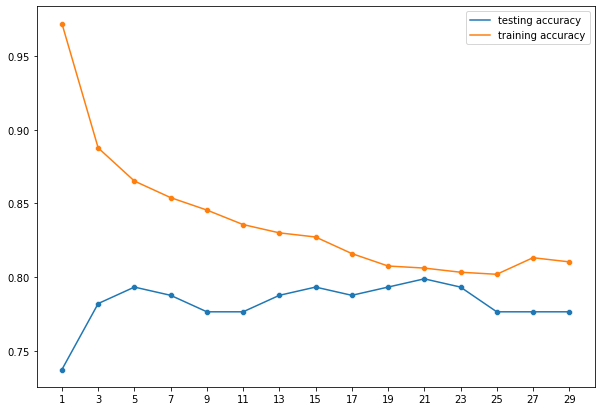

In [57]:
plt.figure(figsize=(10,7))
sns.lineplot(k,testing_score)
sns.scatterplot(k,testing_score)
sns.lineplot(k,training_score)
sns.scatterplot(k,training_score)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))
plt.show()

In [58]:
print('best k:', best_k)
print('best score:', score)

best k: 21
best score: 0.7988826815642458


# Decision Tree Classifier

### without Scalling

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [79]:
tree_wo=DecisionTreeClassifier(max_depth=3)
tree_wo.fit(x_train,y_train)
y_predict=tree_wo.predict(x_test)

In [86]:
print('Nilai akurasi model Decision Tree Classifier without scalling:', accuracy_score(y_test,y_predict))

Nilai akurasi model Decision Tree Classifier without scalling: 0.776536312849162


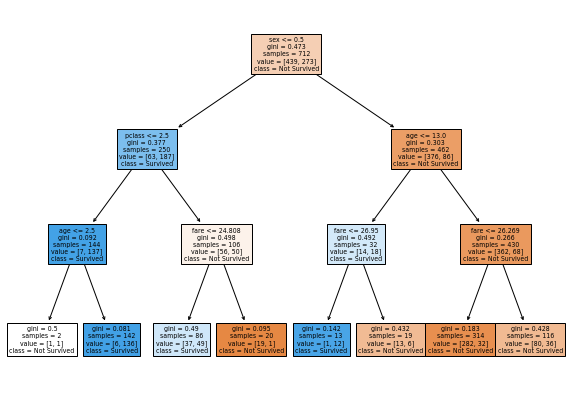

In [82]:
plt.figure(figsize=(10,7))
plot_tree(tree_wo,feature_names=list(x), class_names=['Not Survived','Survived'],filled=True)
plt.show()

### with Scalling

In [83]:
tree_w=DecisionTreeClassifier(max_depth=3)
tree_w.fit(x_train_scaled,y_train)
y_predict=tree_w.predict(x_test_scaled)

In [84]:
print('Nilai akurasi model Decision Tree Classifier with scalling:', accuracy_score(y_test,y_predict))

Nilai akurasi model Decision Tree Classifier with scalling: 0.776536312849162


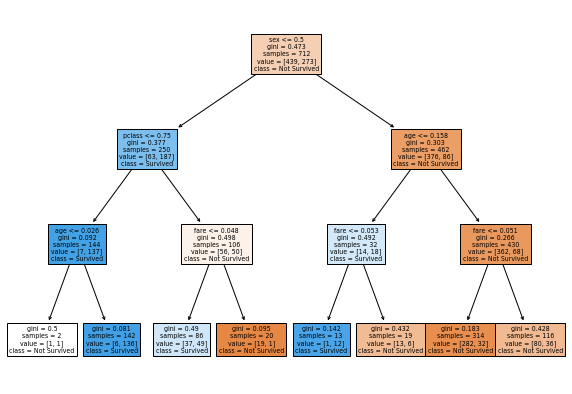

In [85]:
plt.figure(figsize=(10,7))
plot_tree(tree_w,feature_names=list(x), class_names=['Not Survived','Survived'],filled=True)
plt.show()